# Семинар 10
## Предобуславливатели

In [121]:
import numpy as np
import scipy.sparse.linalg as spsplin
import matplotlib.pyplot as plt
import scipy.sparse as spsp
%matplotlib inline

In [141]:
n = 127
A = np.random.randn(n, n)
Q, _ = np.linalg.qr(A)
# D = np.diag(np.array([1e-4, 1] + [*np.arange(95, 100, 0.04)]))
D = np.diag(np.linspace(1e-4, 100, num=n))
print(D.shape)
A = Q @ D @ Q.T

rhs = np.random.randn(n)



(127, 127)


In [155]:
cg_cl = []
def callback(x):
    cg_cl.append(x.copy())
x = spsplin.cg(A, rhs, callback=callback)[0]
%timeit spsplin.cg(A, rhs, callback=callback)[0]
print(np.linalg.norm(A @ x - rhs))

2.96 ms ± 139 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
9.697687964167026e-05


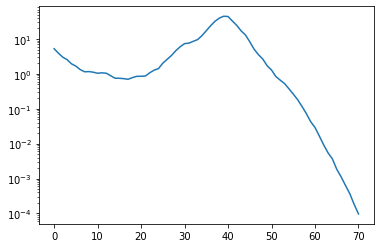

In [143]:
plt.semilogy([np.linalg.norm(A @ x - rhs) for x in cg_cl])

999999.9998246956


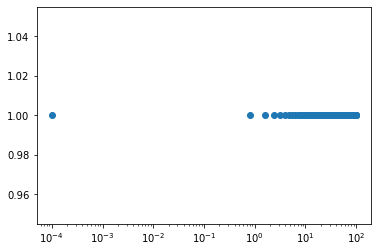

In [144]:
eigvals = np.linalg.eigvalsh(A)
plt.scatter(eigvals, np.ones_like(eigvals))
plt.xscale("log")
print(max(eigvals) / min(eigvals))


In [145]:
# Test Jacobi
jac_prec = lambda x: x / np.diag(A)
cg_cl_jac_prec = []
def callback(x):
    cg_cl_jac_prec.append(x.copy())
x = spsplin.cg(A, rhs, callback=callback, M=spsplin.LinearOperator((n, n), matvec=jac_prec))[0]
print(np.linalg.norm(A @ x - rhs))


6.635599333887681e-05


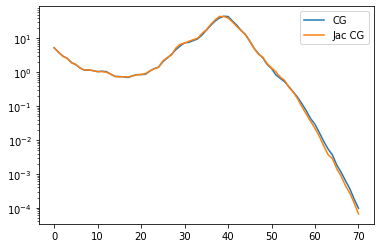

In [146]:
plt.semilogy([np.linalg.norm(A @ x - rhs) for x in cg_cl], label="CG")
plt.semilogy([np.linalg.norm(A @ x - rhs) for x in cg_cl_jac_prec], label="Jac CG")
plt.legend()

6.464426167692792


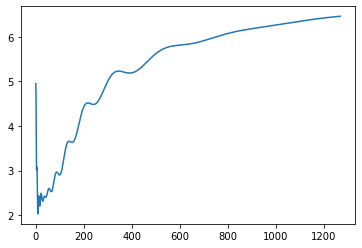

In [148]:
# Test Gauss-Seidel
gs_prec = lambda x: np.linalg.solve(np.tril(A), x)
cg_cl_gs_prec = []
def callback(x):
    cg_cl_gs_prec.append(x.copy())
x = spsplin.cg(A, rhs, callback=callback, M=spsplin.LinearOperator((n, n), matvec=gs_prec))[0]
print(np.linalg.norm(A @ x - rhs))

plt.plot([np.linalg.norm(A @ x - rhs) for x in cg_cl_gs_prec])

In [154]:
# ILU

invA_approx = spsplin.spilu(A, drop_tol=1e-4)
ilu_prec = lambda x: invA_approx.solve(x)
cg_cl_ilu_prec = []
def callback(x):
    cg_cl_ilu_prec.append(x.copy())
x = spsplin.cg(A, rhs, callback=callback, M=spsplin.LinearOperator((n, n), matvec=ilu_prec))[0]
%timeit spsplin.cg(A, rhs, callback=callback, M=spsplin.LinearOperator((n, n), matvec=ilu_prec))[0]
print(np.linalg.norm(A @ x - rhs))

703 µs ± 112 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
4.474626725782316e-06


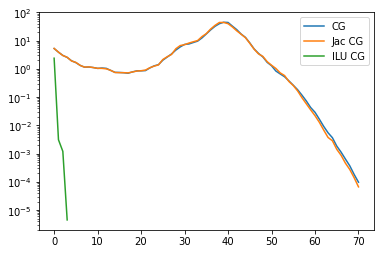

In [153]:
plt.semilogy([np.linalg.norm(A @ x - rhs) for x in cg_cl], label="CG")
plt.semilogy([np.linalg.norm(A @ x - rhs) for x in cg_cl_jac_prec], label="Jac CG")
plt.semilogy([np.linalg.norm(A @ x - rhs) for x in cg_cl_ilu_prec], label="ILU CG")
plt.legend()

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1.]
1.0000000000622091


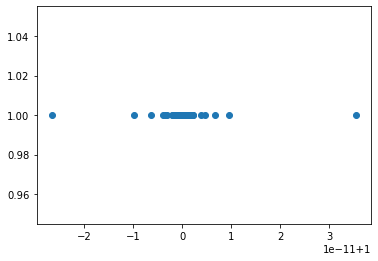

In [156]:
eigvals = np.linalg.eigvalsh(np.array(invA_approx.solve(A)))
print(eigvals)
plt.scatter(eigvals, np.ones_like(eigvals))
print(max(eigvals) / min(eigvals))

(3600, 3600)


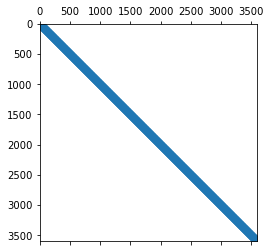

In [160]:
n = 60

ex = np.ones(n);
# A = -sp.sparse.spdiags(np.vstack((ex,  -(2 + 1./n)*ex, (1 + 1./n) * ex)), [-1, 0, 1], n, n, 'csr') 
rhs = np.random.randn(n*n)

ee = spsp.eye(n)
A = -spsp.spdiags(np.vstack((ex,  -(2 + 1./n)*ex, 1. * ex)), [-1, 0, 1], n, n, 'csr')
A = spsp.kron(A, ee) + spsp.kron(ee, A)
plt.spy(A, markersize=1)
print(A.shape)

In [163]:
cg_cl = []
def callback(x):
    cg_cl.append(x.copy())
x = spsplin.cg(A, rhs, callback=callback, tol=1e-8)[0]
print(np.linalg.norm(A @ x - rhs))

5.36589908320451e-07


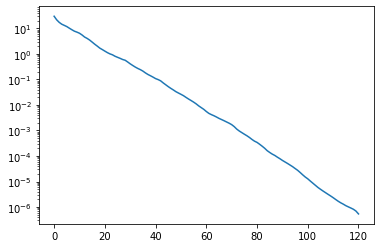

In [164]:
plt.semilogy([np.linalg.norm(A @ x - rhs) for x in cg_cl])

In [185]:
invA_approx = spsplin.spilu(A, drop_tol=1e-2)
ilu_prec = lambda x: invA_approx.solve(x)
cg_cl_ilu_prec = []
def callback(x):
    cg_cl_ilu_prec.append(x.copy())
x = spsplin.cg(A, rhs, tol=1e-8, callback=callback, M=spsplin.LinearOperator((n**2, n**2), matvec=ilu_prec))[0]
print(np.linalg.norm(A @ x - rhs))

4.0716678505691855e-07


/Users/alex/anaconda3/lib/python3.7/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:407: SparseEfficiencyWarning: splu requires CSC matrix format
  warn('splu requires CSC matrix format', SparseEfficiencyWarning)


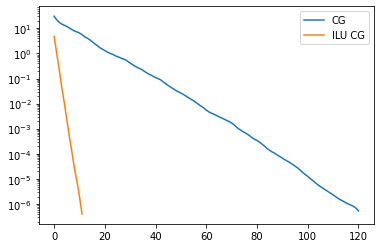

In [186]:
plt.semilogy([np.linalg.norm(A @ x - rhs) for x in cg_cl], label="CG")
plt.semilogy([np.linalg.norm(A @ x - rhs) for x in cg_cl_ilu_prec], label="ILU CG")
plt.legend()

In [187]:
Aprec = invA_approx.solve(A.toarray())